## 1. Dataset loading
### Loading the CSV dataset into pandas DataFrame

In [1]:
import pandas as pd

# Load the dataset (replace with the actual path to your file)
#df = pd.read_csv('path_to_your_dataset.csv')
df = pd.read_csv('F:\\Data science self learn\\datasets\\Obesity Classification.csv') # i got this dataset from kaggle link for the dataset
#https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

# View the first few rows to check the data structure
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


## 2. Data exploration
### explore the data and check any missing values and understand its structure

In [2]:
# Check the data types and summary info
df.info()

# Check for missing values
df.isnull().sum()

# Check the distribution of weight categories (the target variable)
df['Label'].value_counts()

# for the shape or to count the rows
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


(108, 7)

## 3. Data Preprocessing
### A. Handle Missing Values: If there are missing values, handle them by either removing the rows or imputing with an appropriate strategy. But in here we would like to remove the missiong even though we don't have any missing rows

In [3]:
# here we don't need the id column so we delete that thing
df = df.drop(columns=['ID'])

### B. Convert Categorical Data: If the gender column is categorical (e.g., 'Male' and 'Female'), convert it into numerical format using one-hot encoding or label encoding.

In [4]:
#df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # One-hot encoding for 'Gender'
#cannot run again after it is run once it shows error after one time exicution
#so we would like to convert the following code in to condition for checking wheither the df have column named as Gender and then if have then convert

# Check if 'Gender' column exists in the DataFrame
if 'Gender' in df.columns:
    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # One-hot encoding for 'Gender'


## 4. Prepare the Features (X) and Labels (y)
### Separate the features (age, gender, height, weight, BMI) from the labels (weight categories: underweight, normal weight, overweight, obese).

In [5]:
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable (weight categories)

# this code extracts all the other feature except label into x and the label column in y

## 5. Train-Test Split
### Split the dataset into training and testing sets to evaluate the model’s performance.

In [6]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test because we used test_size otherwise default is 75% and 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Choose a Classification Model
### You can try different classification models such as Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), or Logistic Regression (for multinomial classification).
### Example: Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)
# now at this position our model is ready 
# where we teaught our model to predict or classify the obesity of the person

RandomForestClassifier()

## 7. Evaluate the Model performance
### Evaluate the model's performance using accuracy, confusion matrix, and classification report to see how well it classifies the individuals into the four categories.

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")


Accuracy: 1.0
Confusion Matrix:
[[6 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 8]]
Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



In [9]:
#cross vallidation for models performence

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Using the entire dataset for CV

# Print the average cross-validation score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Scores: [0.95454545 1.         1.         1.         1.        ]
Mean CV Accuracy: 0.990909090909091


## 8. Make Predictions on New Data
### Once your model is trained, you can use it to predict the obesity category for new data.

In [17]:
print(X_train.columns)  # This will show the features used in training


Index(['Age', 'Height', 'Weight', 'BMI', 'Gender_Male'], dtype='object')


In [18]:
# we will write the code to auto calculate the bmi but for let us predict the manuallly putted data
# the new data also should be in the dataframe of pandas
# new_data = [[30, 175, 80, 25.6, 1]]  # Example: Age, Height, Weight, BMI, Gender (1 = Male, 0 = Female)
new_data = pd.DataFrame([[30, 175, 80, 25.6, 1]], columns=['Age', 'Height', 'Weight', 'BMI', 'Gender_Male'])

prediction = model.predict(new_data)
print(f"Predicted Category: {prediction}")


Predicted Category: ['Normal Weight']


In [19]:
# now creating a function for calculating bmi
def calculate_bmi(weight, height_cm):
    """
    Calculate BMI given weight in kilograms and height in centimeters.

    Parameters:
    weight (float): Weight of the person in kilograms.
    height_cm (float): Height of the person in centimeters.

    Returns:
    float: Calculated BMI.
    """
    if height_cm <= 0:
        raise ValueError("Height must be greater than zero.")
    
    # Convert height from cm to meters
    height_m = height_cm / 100
    bmi = weight / (height_m ** 2)
    return bmi

# Example usage
weight = 62  # in kilograms
height_cm = 167.64  # in centimeters

bmi = calculate_bmi(weight, height_cm)
print(f"The calculated BMI is: {bmi:.2f}")


The calculated BMI is: 22.06


In [20]:
def predict_category():
    # Collect user input
    height = float(input("Enter your height (cm): "))
    weight = float(input("Enter your weight (kg): "))
    age = int(input("Enter your age: "))
    gender = input("Enter your gender (1 for male 0 for female): ")

    # Calculate BMI
    bmi = calculate_bmi(weight, height)

    print("\nYou entered the following details:")
    print(f"Height: {height} cm")
    print(f"Weight: {weight} kg")
    print(f"Age: {age}")
    print(f"Gender: {gender}")
    print(f"BMI: {bmi:.2f}")

    # Store values in a 2D dataframe
    user_details = pd.DataFrame([[age,height,weight,bmi,gender]], columns=['Age', 'Height', 'Weight', 'BMI', 'Gender_Male'])
    prediction = model.predict(user_details)
    print(f"Predicted Category: {prediction}")
predict_category()

Enter your height (cm):  167.64
Enter your weight (kg):  62
Enter your age:  19
Enter your gender (1 for male 0 for female):  1



You entered the following details:
Height: 167.64 cm
Weight: 62.0 kg
Age: 19
Gender: 1
BMI: 22.06
Predicted Category: ['Normal Weight']


Accuracy: 1.0


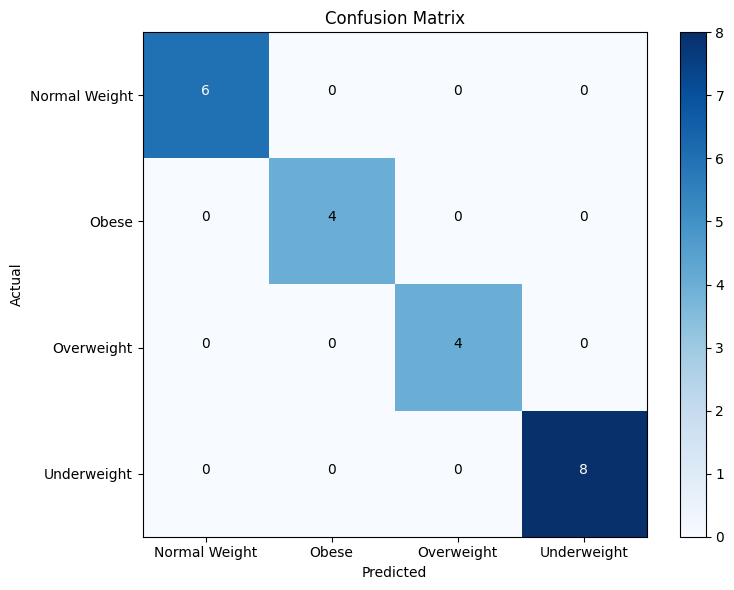

Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



In [14]:
# at the end visuallizing our model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Unique class labels
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))

# Add labels and annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")
